# **Project on Cabdriver churning through Ensemble machine learning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("xyz.csv")
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


### **Created Target Variable with help of LastWorkingDate(Feature Engineering)**

**Target variable creation: Created a column "target" which tells whether the driver has left the company- driver whose last working day is present will have the value 1 and we can called it as retain drivers and other is 0 called drivers churn.**

In [ ]:
df["LastWorkingDate"]=df["LastWorkingDate"].replace(np.nan, 0)

In [ ]:
def target(x):
  if x == 0:
    return 0
  else:
    return 1

In [ ]:
df['target']=df["LastWorkingDate"].apply(target)

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,2381060,2,0
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,-665480,2,0
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,0
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,0


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'target'],
      dtype='object')

In [ ]:
df.shape

(19104, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       19104 non-null  object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
 13  target                19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df["Reporting_date"]=df['MMM-YY'] # Renameing MMM-YY as Reporting_date
df=df.drop('MMM-YY',axis=1)

In [ ]:
df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,Reporting_date
0,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,2381060,2,0,01/01/19
1,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,-665480,2,0,02/01/19
2,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,03/01/19
3,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,0,11/01/20
4,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1,0,12/01/20


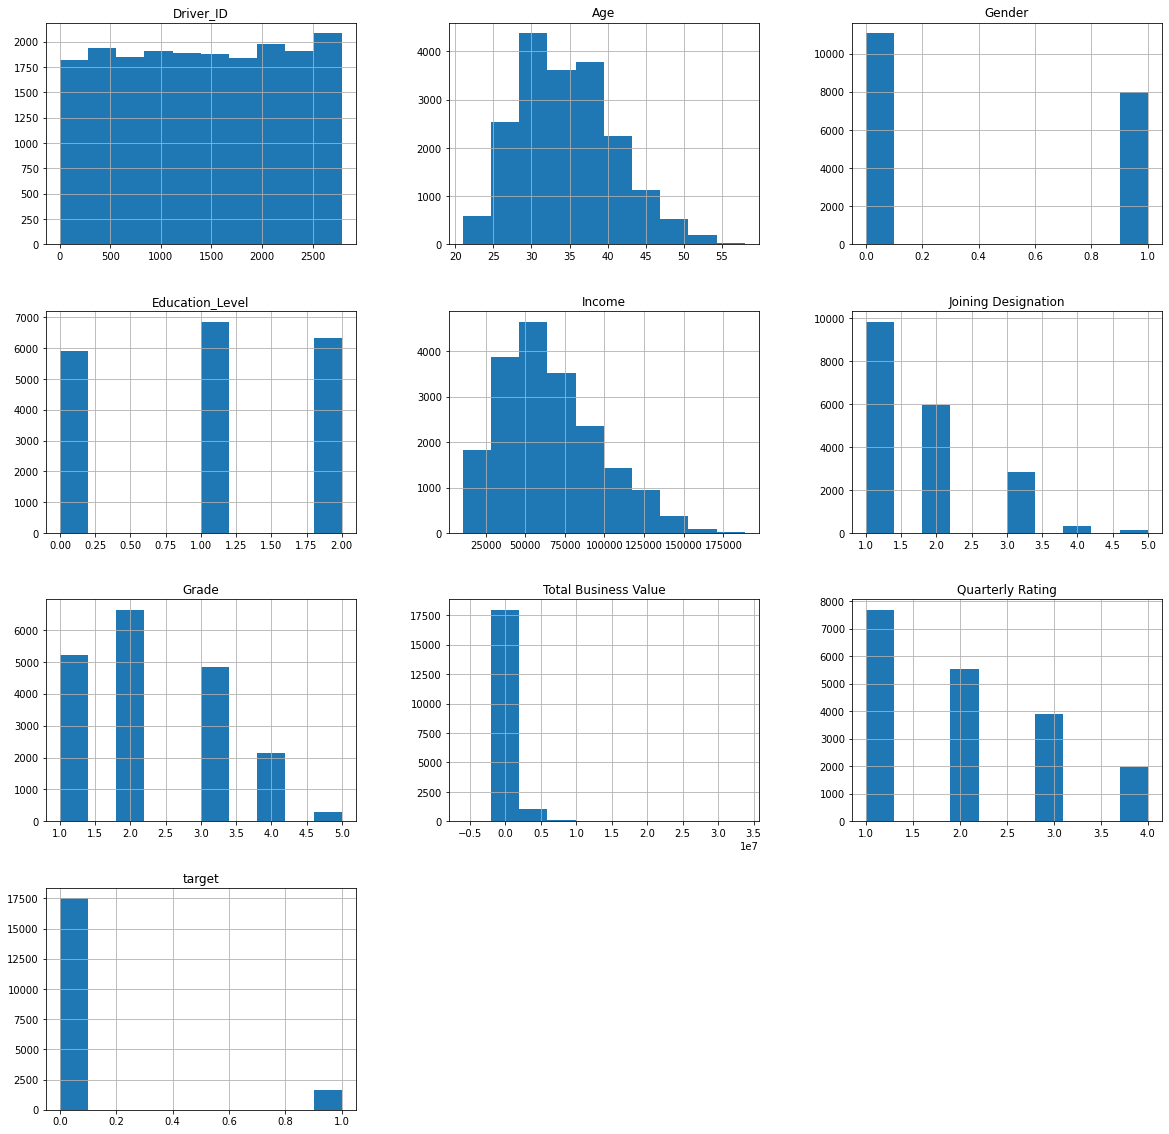

In [ ]:
df.hist(figsize = (20,20))    # checking data distrubution for all the features.
plt.show()

### **Converting some date-like features to their respective data type:-**

In [ ]:
df["Dateofjoining"]=df["Dateofjoining"].astype("datetime64[ns]")
df["LastWorkingDate"]=df["LastWorkingDate"].astype("datetime64[ns]")
df["Reporting_date"]=df["Reporting_date"].astype("datetime64[ns]")
df["Joining Designation"]=df["Joining Designation"].astype("category")
df["Grade"]=df["Grade"].astype("category")
df["Quarterly Rating"]=df["Quarterly Rating"].astype("category")
df["City"]=df["City"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             19104 non-null  int64         
 1   Age                   19043 non-null  float64       
 2   Gender                19052 non-null  float64       
 3   City                  19104 non-null  category      
 4   Education_Level       19104 non-null  int64         
 5   Income                19104 non-null  int64         
 6   Dateofjoining         19104 non-null  datetime64[ns]
 7   LastWorkingDate       19104 non-null  datetime64[ns]
 8   Joining Designation   19104 non-null  category      
 9   Grade                 19104 non-null  category      
 10  Total Business Value  19104 non-null  int64         
 11  Quarterly Rating      19104 non-null  category      
 12  target                19104 non-null  int64         
 13  Reporting_date  

## **Cheking Unique Values and Value counts**

In [ ]:
df["Age"].value_counts(bins=10)  # Maximum driver average age is between 28 to 32 years.
                                 # very less driver age is above 50 years

(28.4, 32.1]      4378
(35.8, 39.5]      3787
(32.1, 35.8]      3622
(24.7, 28.4]      2531
(39.5, 43.2]      2239
(43.2, 46.9]      1128
(20.962, 24.7]     594
(46.9, 50.6]       536
(50.6, 54.3]       200
(54.3, 58.0]        28
Name: Age, dtype: int64

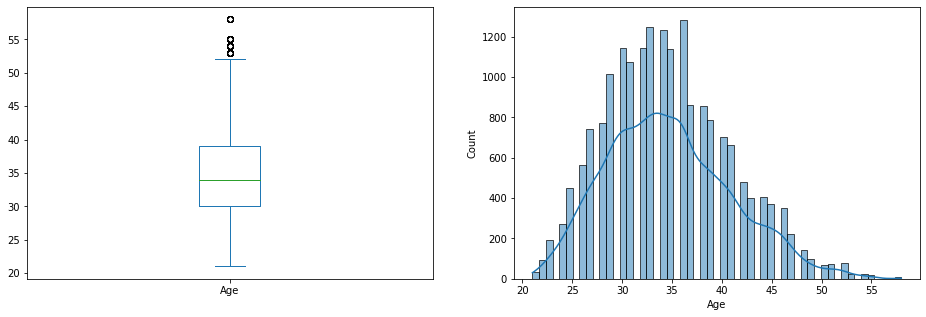

In [ ]:
plt.subplot(121)
df["Age"].plot.box(figsize=(16,5))    # Median is at 34 years
plt.subplot(122)                      # Age data is  normaly distributed
sns.histplot(df["Age"], kde=True)     # very less outliers present but it's age of driver so we will consider it as value information
plt.show()

In [ ]:
df["Gender"].value_counts()  # Gender of the driver :– Male : 0, Female: 1
                             # count of male driver is more as comapaire to female driver

0.0    11074
1.0     7978
Name: Gender, dtype: int64

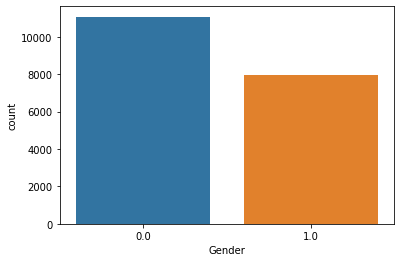

In [ ]:
sns.countplot(data=df,x="Gender") # Visual representation of the above code
plt.show()                        # Gender of the driver :– Male : 0, Female: 1

In [ ]:
df["City"].unique()

['C23', 'C7', 'C13', 'C9', 'C11', ..., 'C4', 'C3', 'C16', 'C22', 'C12']
Length: 29
Categories (29, object): ['C1', 'C10', 'C11', 'C12', ..., 'C6', 'C7', 'C8', 'C9']

In [ ]:
df["City"].value_counts().head(5) # top 5 city having maximum ola cab service

C20    1008
C29     900
C26     869
C22     809
C27     786
Name: City, dtype: int64

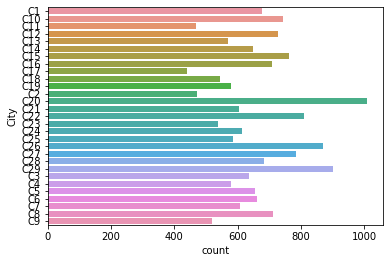

In [ ]:
sns.countplot(data=df,y="City") # visual reprentation of above value
plt.show()

In [ ]:
df["Education_Level"].unique()  # Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

array([2, 0, 1])

In [ ]:
df["Education_Level"].value_counts() # Maximum driver having education level as 1 means 12+

1    6864
2    6327
0    5913
Name: Education_Level, dtype: int64

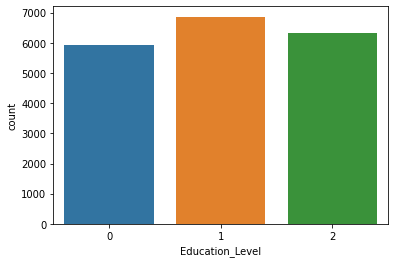

In [ ]:
sns.countplot(data=df,x="Education_Level") # visual reprentation of above value
plt.show()

In [ ]:
df["Income"].value_counts(bins=10) # maximum income is lie between the range 46k to 64k

(46281.2, 64048.3]      4659
(28514.1, 46281.2]      3868
(64048.3, 81815.4]      3528
(81815.4, 99582.5]      2363
(10569.328, 28514.1]    1820
(99582.5, 117349.6]     1432
(117349.6, 135116.7]     945
(135116.7, 152883.8]     373
(152883.8, 170650.9]      92
(170650.9, 188418.0]      24
Name: Income, dtype: int64

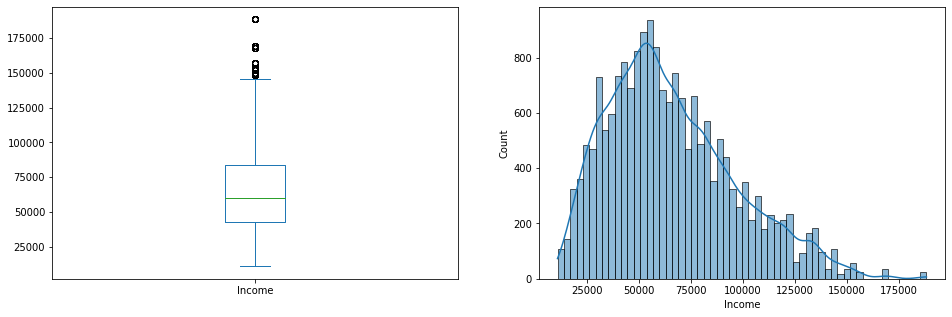

In [ ]:
plt.subplot(121)
df["Income"].plot.box(figsize=(16,5))    # Median is between 50k to 75k
plt.subplot(122)                         # Income data is  right skewed distributed
sns.histplot(df["Income"], kde=True)     # outliers present but it's income of driver per month so we will consider it as value information.
plt.show()

In [ ]:
df["Reporting_date"].dt.year.value_counts() # maximum driver reporting at the year 2019

2019    9708
2020    9396
Name: Reporting_date, dtype: int64

<AxesSubplot:>

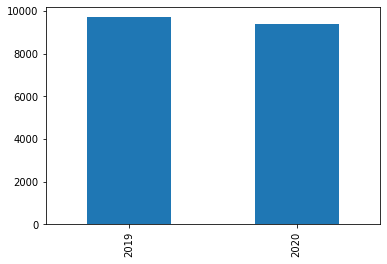

In [ ]:
df["Reporting_date"].dt.year.value_counts().plot(kind="bar") # visual reprentation of reporting year of the drivers.

In [ ]:
df["Reporting_date"].dt.month.value_counts()

1     1804
2     1705
12    1614
3     1589
11    1586
9     1571
8     1566
7     1563
10    1557
5     1530
4     1523
6     1496
Name: Reporting_date, dtype: int64

In [ ]:
df["Dateofjoining"].dt.year.value_counts()  # Joining date for the driver

2018    4936
2019    4515
2020    3667
2015    1965
2016    1625
2017    1100
2013     693
2014     603
Name: Dateofjoining, dtype: int64

<AxesSubplot:>

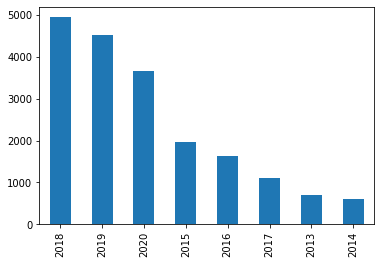

In [ ]:
df["Dateofjoining"].dt.year.value_counts().plot(kind="bar") # maximum driver join in 2018
                                                            # there is drastic hike in driver joining count from 2017 to 2018
                                                            # 2013 to 2017 there is incrase in driver joining.
                                                            # in 2019 and then in 2020 the no of driver joining count falls

In [ ]:
df["Dateofjoining"].dt.month.value_counts() # maximimum driver join in the month of july

7     2730
5     2362
10    2095
6     1973
8     1886
11    1867
9     1449
1     1381
12    1261
4     1014
2      684
3      402
Name: Dateofjoining, dtype: int64

<AxesSubplot:>

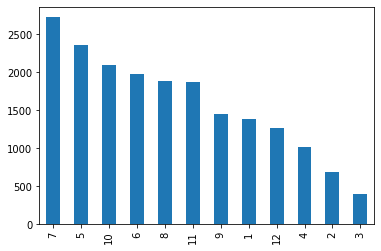

In [ ]:
df["Dateofjoining"].dt.month.value_counts().plot(kind="bar") # visual reprentation of above information

In [ ]:
df["LastWorkingDate"].dt.year.value_counts()  # from this count we can observe one this that there may be missing value present
                                              # maximum driver last working date fall under 2020 year.

1970    17488
2019      825
2020      786
2018        5
Name: LastWorkingDate, dtype: int64

In [ ]:
df["target"].value_counts() # for 17,488 last working date is not given. it mean there can be chances that drive leave ola driving job.
                            # for 1616 driver last working date is given it means they are still working in ola

0    17488
1     1616
Name: target, dtype: int64

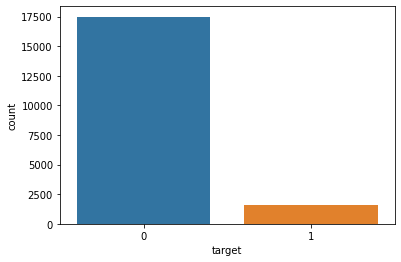

In [ ]:
sns.countplot(data=df,x="target") # visual reprentation of above value
plt.show()

**From "target" variable we can observe that the we have to work on Class Imbalance treatment before building the machine learning model.**

In [ ]:
df["Joining Designation"].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]

In [ ]:
df["Joining Designation"].value_counts() # Designation of the driver at the time of joining maximum driver has designation 1.

1    9831
2    5955
3    2847
4     341
5     130
Name: Joining Designation, dtype: int64

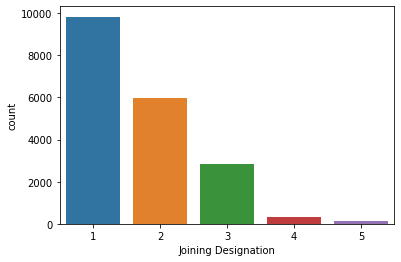

In [ ]:
sns.countplot(data=df,x="Joining Designation") # visual reprentation of above value
plt.show()

In [ ]:
df["Grade"].value_counts()   #  Grade of the driver at the time of reporting maximum drive grade is 2.
                             # maximum count of driver grade fall between 1 to 4. which is good
                             # very less driver has 5 grade
                             # ola has to improve there driver rating for better customer support

2    6627
1    5202
3    4826
4    2144
5     305
Name: Grade, dtype: int64

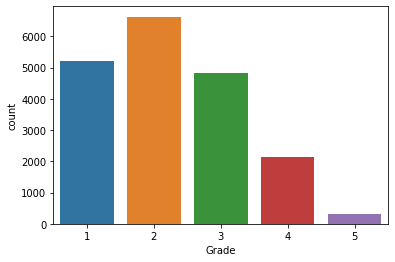

In [ ]:
sns.countplot(data=df,x="Grade") # visual reprentation of above value
plt.show()

In [ ]:
df["Quarterly Rating"].value_counts()  # Quarterly rating of the driver: 1,2,3,4,5 (higher is better)
                                       # maximum driver got rating 1 it means they are not proving good service
                                       # no driver got rating 5
                                       # rating 3 driver count is 3895

1    7679
2    5553
3    3895
4    1977
Name: Quarterly Rating, dtype: int64

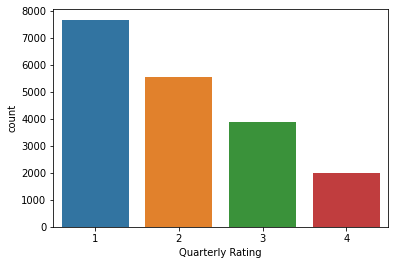

In [ ]:
sns.countplot(data=df,x="Quarterly Rating") # visual reprentation of above value
plt.show()

In [ ]:
df["Total Business Value"].value_counts(bins=10)

(-2025228.0, 1949544.0]       17943
(1949544.0, 5924316.0]         1014
(5924316.0, 9899088.0]           99
(9899088.0, 13873860.0]          31
(13873860.0, 17848632.0]          9
(-6039747.721, -2025228.0]        5
(17848632.0, 21823404.0]          1
(21823404.0, 25798176.0]          1
(29772948.0, 33747720.0]          1
(25798176.0, 29772948.0]          0
Name: Total Business Value, dtype: int64

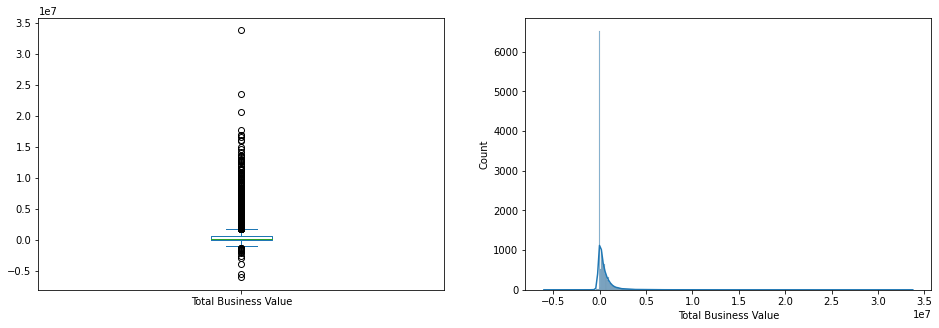

In [ ]:
plt.subplot(121)                                       # The total business value acquired by the driver in a month
df["Total Business Value"].plot.box(figsize=(16,5))    # Mean of total business value is approx. 0.0 because, negative business indicates cancellation/refund or car EMI adjustments
plt.subplot(122)                                       # Total business value data is  right skewed distributed.
sns.histplot(df["Total Business Value"], kde=True)     # outliers present in the data all value are trating as outliers.
plt.show()

## **Bivariate Analysis**

<AxesSubplot:xlabel='Quarterly Rating', ylabel='Income'>

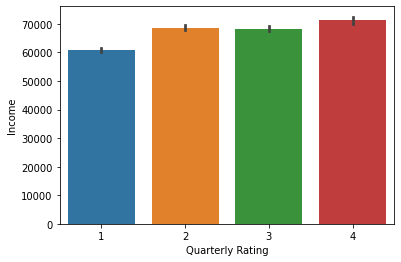

In [ ]:
sns.barplot(x="Quarterly Rating",y="Income",data=df,estimator=np.mean) # High rating driver has high income

<AxesSubplot:xlabel='Quarterly Rating', ylabel='Total Business Value'>

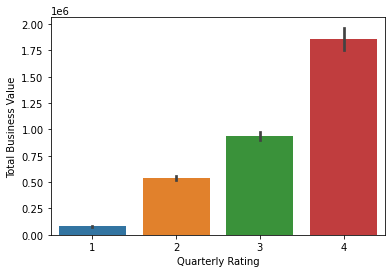

In [ ]:
sns.barplot(x="Quarterly Rating",y="Total Business Value",data=df,estimator=np.mean) # driver with high ratinging gives us high total_business_value.

<AxesSubplot:xlabel='Quarterly Rating', ylabel='Age'>

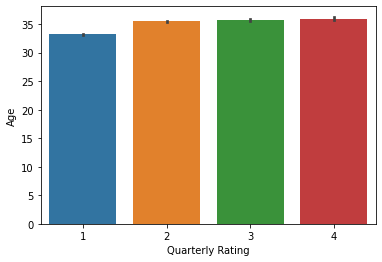

In [ ]:
sns.barplot(x="Quarterly Rating",y="Age",data=df,estimator=np.mean) # almost all age group driver got rating between 1 to 4.

<AxesSubplot:xlabel='Income', ylabel='Density'>

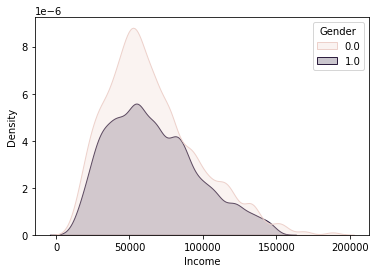

In [ ]:
sns.kdeplot(x="Income",data=df,hue="Gender",shade=True) # male income is more than the female we observe this from graph.

<AxesSubplot:xlabel='City', ylabel='Income'>

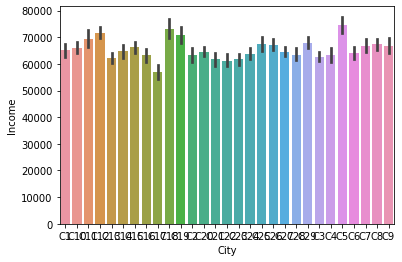

In [ ]:
sns.barplot(y="Income",x="City",data=df,estimator=np.mean)

In [ ]:
pd.crosstab(index=df['Gender'],columns=df['target'],margins=True)  # target:- 0:churn, 1:nonchurn
                                                                   # Gender:- 0:men, 1:female
                                                                   # out off 11074 total men 10130 got churn and 944 retain

target,0,1,All
Gender,,,
0.0,10130,944,11074
1.0,7311,667,7978
All,17441,1611,19052


In [ ]:
pd.crosstab(index=df["City"],columns=df["target"],margins=True)  # maximum driver churn fron city C20 and C22
                                                                 # maximum driver retain fron city C20 and C15

target,0,1,All
City,,,
C1,621,56,677
C10,683,61,744
C11,423,45,468
C12,674,53,727
C13,511,58,569
C14,590,58,648
C15,692,69,761
C16,659,50,709
C17,385,55,440


## **Mulativariate Analysis**

<AxesSubplot:xlabel='Income', ylabel='Age'>

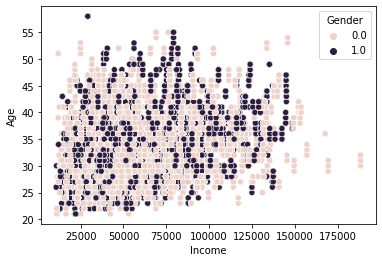

In [ ]:
sns.scatterplot(df["Income"],df["Age"],df["Gender"])  # No correlation between mothly income and driver age

<AxesSubplot:xlabel='Income', ylabel='Total Business Value'>

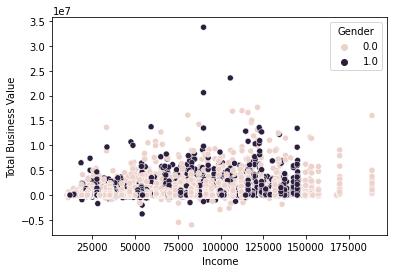

In [ ]:
sns.scatterplot(df["Income"],df["Total Business Value"],df["Gender"]) # Can't see any correlation between income and total_business_value

## **Check correlation among different factors using heat maps**

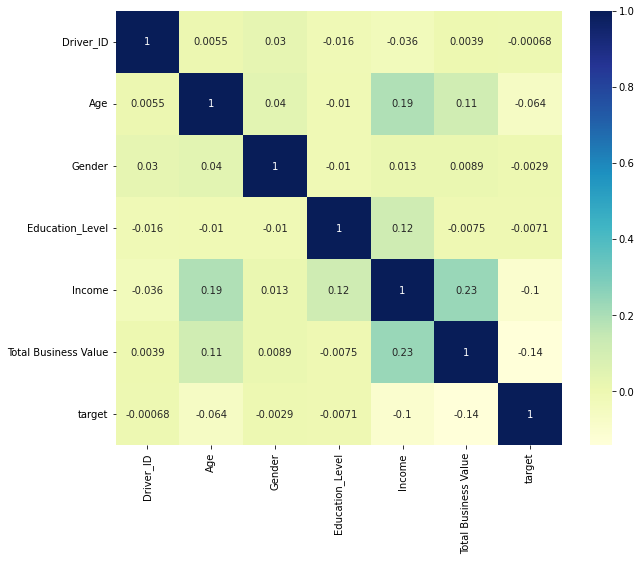

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Total Business Value,target
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,5.716621e+05,0.084590
std,810.705321,6.257912,0.493367,0.800167,30914.515344,1.128312e+06,0.278277
min,1.000000,21.000000,0.000000,0.000000,10747.000000,-6.000000e+06,0.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,0.000000e+00,0.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,2.500000e+05,0.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,6.997000e+05,0.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,3.374772e+07,1.000000


**From above desciption table we can see some important points:-**

*   It is given that each driver ID have unique driver_id but max is 2788 it means driver_id is getting repeated.
*   The average Age of the driver is 34 and maximum age is 58.

*   There are 2 gender category and 0 is most it means male driver category is more almost 11074.



*   mean aducation_level is 1.
*   Average mean income is 65652 rupees and maximum Monthly average Income of the driver is 188418 rupees.

*   Total business value (The total business value acquired by the driver in a month) mean is 571662.







In [ ]:
df.describe(include=['object','category'])

,City,Joining Designation,Grade,Quarterly Rating
count,19104,19104,19104,19104
unique,29,5,5,4
top,C20,1,2,1
freq,1008,9831,6627,7679


**From above desciption table we can see some important points:-**

*  There are 29 unique city where ola cap business running
*  Top city is C20 with 1008 driver or ola cab working.


*   Maximum joiing designation receiving driver is 1 that is 9831

*   Maximum driver are of grade 2.
*   maximum driver got rating 1. which is poor rating.








### **Checking duplicate values**

In [ ]:
bool_series = df.duplicated() # From value count we can see that there are zero duplicate values in the data present.
bool_series.value_counts()

False    19104
dtype: int64

### **Checking missing values**

In [ ]:
df.isna().sum()

Driver_ID                0
Age                     61
Gender                  52
City                     0
Education_Level          0
Income                   0
Dateofjoining            0
LastWorkingDate          0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
target                   0
Reporting_date           0
dtype: int64

In [ ]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [ ]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent
Age,61,0.319305
Gender,52,0.272194


**From above missing value table we can conclude something:-**

*   LastWorkingDate missing value percentage is 91.54% so we can treat this by droping this column.
*   In Age there are 61 values are missing so we can treat it by using KNN Imputation.

*   In Gender there are 52 values are missing so we can treat it by using KNN Imputation.





In [ ]:
df=df.drop('LastWorkingDate',axis=1) # drop last working day column

## **KNN Imputation**

Removing missing values using KNN imputation techanique

In [ ]:
df.isna().sum()

Driver_ID                0
Age                     61
Gender                  52
City                     0
Education_Level          0
Income                   0
Dateofjoining            0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
target                   0
Reporting_date           0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             19104 non-null  int64         
 1   Age                   19043 non-null  float64       
 2   Gender                19052 non-null  float64       
 3   City                  19104 non-null  category      
 4   Education_Level       19104 non-null  int64         
 5   Income                19104 non-null  int64         
 6   Dateofjoining         19104 non-null  datetime64[ns]
 7   Joining Designation   19104 non-null  category      
 8   Grade                 19104 non-null  category      
 9   Total Business Value  19104 non-null  int64         
 10  Quarterly Rating      19104 non-null  category      
 11  target                19104 non-null  int64         
 12  Reporting_date        19104 non-null  datetime64[ns]
dtypes: category(4), 

In [ ]:
num=df.select_dtypes(include=["float64","int64"])

In [ ]:
num

,Driver_ID,Age,Gender,Education_Level,Income,Total Business Value,target
0,1,28.0,0.0,2,57387,2381060,0
1,1,28.0,0.0,2,57387,-665480,0
2,1,28.0,0.0,2,57387,0,1
3,2,31.0,0.0,2,67016,0,0
4,2,31.0,0.0,2,67016,0,0
...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,2,70254,740280,0
19100,2788,30.0,0.0,2,70254,448370,0
19101,2788,30.0,0.0,2,70254,0,0
19102,2788,30.0,0.0,2,70254,200420,0


In [ ]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(num), columns = num.columns)
df1.head()

,Driver_ID,Age,Gender,Education_Level,Income,Total Business Value,target
0,0.000000,0.189189,0.0,1.0,0.262508,0.210856,0.0
1,0.000000,0.189189,0.0,1.0,0.262508,0.134209,0.0
2,0.000000,0.189189,0.0,1.0,0.262508,0.150952,1.0
3,0.000359,0.270270,0.0,1.0,0.316703,0.150952,0.0
4,0.000359,0.270270,0.0,1.0,0.316703,0.150952,0.0


In [ ]:
imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

In [ ]:
df1.isna().sum()

Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Total Business Value    0
target                  0
dtype: int64

In [ ]:
cat=df.select_dtypes(include=["category","datetime64[ns]"])

In [ ]:
df=pd.concat([df1, cat], axis=1)

**Removed all missing values**

In [ ]:
df.isna().sum()   # removed all the missing values

Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Total Business Value    0
target                  0
City                    0
Dateofjoining           0
Joining Designation     0
Grade                   0
Quarterly Rating        0
Reporting_date          0
dtype: int64

## **Aggregating data by storing unique Driver IDs**

In [ ]:
df.head(10)

,Driver_ID,Age,Gender,Education_Level,Income,Total Business Value,target,City,Dateofjoining,Joining Designation,Grade,Quarterly Rating,Reporting_date
0,0.000000,0.189189,0.0,1.0,0.262508,0.210856,0.0,C23,2018-12-24,1,1,2,2019-01-01
1,0.000000,0.189189,0.0,1.0,0.262508,0.134209,0.0,C23,2018-12-24,1,1,2,2019-02-01
2,0.000000,0.189189,0.0,1.0,0.262508,0.150952,1.0,C23,2018-12-24,1,1,2,2019-03-01
3,0.000359,0.270270,0.0,1.0,0.316703,0.150952,0.0,C7,2020-11-06,2,2,1,2020-11-01
4,0.000359,0.270270,0.0,1.0,0.316703,0.150952,0.0,C7,2020-11-06,2,2,1,2020-12-01
5,0.001076,0.594595,0.0,1.0,0.308750,0.150952,0.0,C13,2019-12-07,2,2,1,2019-12-01
6,0.001076,0.594595,0.0,1.0,0.308750,0.150952,0.0,C13,2019-12-07,2,2,1,2020-01-01
7,0.001076,0.594595,0.0,1.0,0.308750,0.150952,0.0,C13,2019-12-07,2,2,1,2020-02-01
8,0.001076,0.594595,0.0,1.0,0.308750,0.159758,0.0,C13,2019-12-07,2,2,1,2020-03-01
9,0.001076,0.594595,0.0,1.0,0.308750,0.150952,1.0,C13,2019-12-07,2,2,1,2020-04-01


In [ ]:
df['Quarterly Rating']=df["Quarterly Rating"].astype("int64")

In [ ]:
df1=df.groupby('Driver_ID')['Total Business Value'].sum()
df2=df.groupby('Driver_ID')['Income'].sum()
df3=df.groupby('Driver_ID')['Quarterly Rating'].sum()

In [ ]:
creat_df_dic={
    'Age':'first',
    'Gender':'first',
    'Education_Level':'first',
    'City':'first',
    'Dateofjoining':'first',
    'Joining Designation': 'first',
    'Grade': 'first',
    'Reporting_date':'last',
    'target' : 'last',
    'Income':'last',
    'Quarterly Rating':'last',
    'Total Business Value':'last'

}

In [ ]:
df=df.groupby('Driver_ID').agg(creat_df_dic).reset_index()

In [ ]:
df_new=df.merge(df1,on='Driver_ID').merge(df2,on='Driver_ID').merge(df3,on='Driver_ID')

In [ ]:
df_new.head()

,Driver_ID,Age,Gender,Education_Level,City,Dateofjoining,Joining Designation,Grade,Reporting_date,target,Income_x,Quarterly Rating_x,Total Business Value_x,Total Business Value_y,Income_y,Quarterly Rating_y
0,0.000000,0.189189,0.0,1.0,C23,2018-12-24,1,1,2019-03-01,1.0,0.262508,2,0.150952,0.496018,0.787523,6
1,0.000359,0.270270,0.0,1.0,C7,2020-11-06,2,2,2020-12-01,0.0,0.316703,1,0.150952,0.301904,0.633407,2
2,0.001076,0.594595,0.0,1.0,C13,2019-12-07,2,2,2020-04-01,1.0,0.308750,1,0.150952,0.763566,1.543752,5
3,0.001435,0.216216,0.0,0.0,C9,2019-01-09,1,1,2019-03-01,1.0,0.200489,1,0.150952,0.455884,0.601466,3
4,0.001794,0.270270,1.0,0.5,C11,2020-07-31,3,3,2020-12-01,0.0,0.382623,2,0.150952,0.786586,1.913115,8


## **Feature Engineering**

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Driver_ID               2381 non-null   float64       
 1   Age                     2381 non-null   float64       
 2   Gender                  2381 non-null   float64       
 3   Education_Level         2381 non-null   float64       
 4   City                    2381 non-null   category      
 5   Dateofjoining           2381 non-null   datetime64[ns]
 6   Joining Designation     2381 non-null   category      
 7   Grade                   2381 non-null   category      
 8   Reporting_date          2381 non-null   datetime64[ns]
 9   target                  2381 non-null   float64       
 10  Income_x                2381 non-null   float64       
 11  Quarterly Rating_x      2381 non-null   int64         
 12  Total Business Value_x  2381 non-null   float64 

## **Creating a column that tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1**

In [ ]:
df_new["new_quarter_diff"]=df_new['Quarterly Rating_y']-df_new['Quarterly Rating_x']

In [ ]:
def new_rating(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
df_new["new_Quarterly Rating"]=df_new["new_quarter_diff"].apply(new_rating)

In [ ]:
df_new.head()

,Driver_ID,Age,Gender,Education_Level,City,Dateofjoining,Joining Designation,Grade,Reporting_date,target,Income_x,Quarterly Rating_x,Total Business Value_x,Total Business Value_y,Income_y,Quarterly Rating_y,new_quarter_diff,new_Quarterly Rating
0,0.000000,0.189189,0.0,1.0,C23,2018-12-24,1,1,2019-03-01,1.0,0.262508,2,0.150952,0.496018,0.787523,6,4,1
1,0.000359,0.270270,0.0,1.0,C7,2020-11-06,2,2,2020-12-01,0.0,0.316703,1,0.150952,0.301904,0.633407,2,1,1
2,0.001076,0.594595,0.0,1.0,C13,2019-12-07,2,2,2020-04-01,1.0,0.308750,1,0.150952,0.763566,1.543752,5,4,1
3,0.001435,0.216216,0.0,0.0,C9,2019-01-09,1,1,2019-03-01,1.0,0.200489,1,0.150952,0.455884,0.601466,3,2,1
4,0.001794,0.270270,1.0,0.5,C11,2020-07-31,3,3,2020-12-01,0.0,0.382623,2,0.150952,0.786586,1.913115,8,6,1


In [ ]:
df_new["new_Quarterly Rating"].value_counts() # for 2200 driver rating has change in new dataset.
                                               # for 181 drivers income won't get change

1    2200
0     181
Name: new_Quarterly Rating, dtype: int64

## **Creating a column that tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1**

In [ ]:
df_new["new_income_diff"]=df_new["Income_y"] - df_new["Income_x"]

In [ ]:
df_new["new_income"]=df_new["new_income_diff"].apply(new_rating)

In [ ]:
df_new["new_income"].value_counts()  # for 2199 driver income got change.
                                     # for 182 drivers income won't get change.

1    2199
0     182
Name: new_income, dtype: int64

<AxesSubplot:>

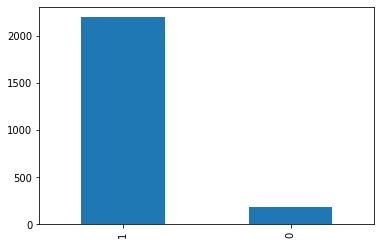

In [ ]:
df_new["new_income"].value_counts().plot(kind='bar')  # after aggregation 1- income increase and 0- income won't increase

# **Statistical summary of the derived dataset**

In [ ]:
df_new.describe()

,Driver_ID,Age,Gender,Education_Level,target,Income_x,Quarterly Rating_x,Total Business Value_x,Total Business Value_y,Income_y,Quarterly Rating_y,new_quarter_diff,new_Quarterly Rating,new_income_diff,new_income
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.501098,0.326851,0.410584,0.503780,0.678706,0.273467,1.427971,0.157664,1.326563,2.479479,16.118438,14.690466,0.923982,2.206012,0.923562
std,0.289258,0.157769,0.491770,0.408145,0.467071,0.159754,0.809839,0.028547,1.213881,3.167223,20.005447,19.487282,0.265083,3.063402,0.265754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.126045,0.148406,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249013,0.216216,0.000000,0.000000,0.000000,0.159604,1.000000,0.150952,0.461662,0.571101,3.000000,2.000000,1.000000,0.378790,1.000000
50%,0.501973,0.324324,0.000000,0.500000,1.000000,0.250846,1.000000,0.150952,0.817539,1.287712,7.000000,6.000000,1.000000,1.048033,1.000000
75%,0.753140,0.432432,1.000000,1.000000,1.000000,0.367190,2.000000,0.155906,1.644219,2.899381,19.000000,18.000000,1.000000,2.629073,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.021253,24.000000,96.000000,92.000000,1.000000,23.000000,1.000000


In [ ]:
df_new.describe(include=['category'])

,City,Joining Designation,Grade
count,2381,2381,2381
unique,29,5,5
top,C20,1,2
freq,152,1026,866


## **Check correlation among independent variables and how they interact with each other**

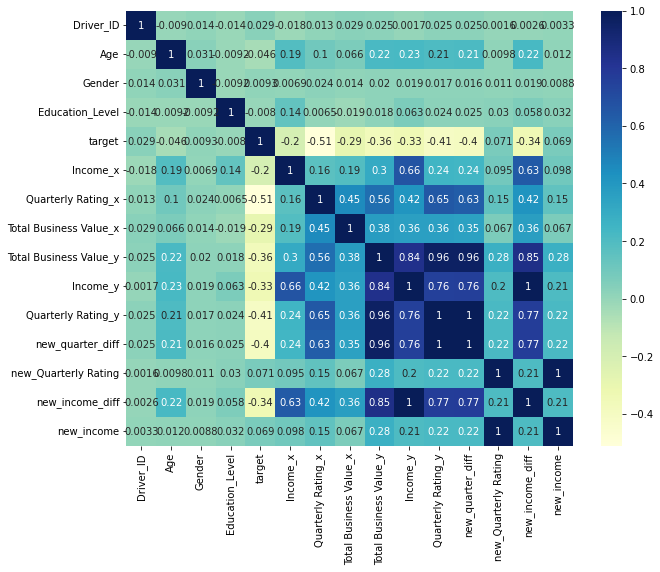

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True)

## **Some observation on above hist plot:-**

*   Target variable is formed from last working date data and we can see it is negative correlated with new_income_diff.
*   new_quarterly_rating has change for more drivers and it is little correlated with new_income_diff and total_business_value_y.

*   new_income is positive correlated with total_business_value_y but with very low correlation value 0.28.
*   new_quarterly_rating and total_bussiness_value_y are highly correlated with each other. it means as the rating of driver increases then the total business will also get increases.

*   Income_y and total_bussiness_value_y are highly correlated it means as the monthly income of driver increases then the business will also get increase.









## **One hot encoding of the categorical variable**

In [ ]:
df_cat= df_new.select_dtypes(include=["category"])

In [ ]:
df_cat.head()

,City,Joining Designation,Grade
0,C23,1,1
1,C7,2,2
2,C13,2,2
3,C9,1,1
4,C11,3,3


In [ ]:
df_cat.describe()

,City,Joining Designation,Grade
count,2381,2381,2381
unique,29,5,5
top,C20,1,2
freq,152,1026,866


In [ ]:
df_cat_dum = pd.get_dummies(df_cat, drop_first=True)

In [ ]:
df_cat_dum

,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,...,City_C8,City_C9,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5,Grade_2,Grade_3,Grade_4,Grade_5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2377,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2378,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Standardization of training data and Class Imbalance Treatment**

In [ ]:
df_new['target'].value_counts()  # data is imbalance

1.0    1616
0.0     765
Name: target, dtype: int64

In [ ]:
df_num= df_new.select_dtypes(include=["int64","float64"])
df_num = df_num.drop("target", axis=1)

In [ ]:
df_num.head()

,Driver_ID,Age,Gender,Education_Level,Income_x,Quarterly Rating_x,Total Business Value_x,Total Business Value_y,Income_y,Quarterly Rating_y,new_quarter_diff,new_Quarterly Rating,new_income_diff,new_income
0,0.000000,0.189189,0.0,1.0,0.262508,2,0.150952,0.496018,0.787523,6,4,1,0.525015,1
1,0.000359,0.270270,0.0,1.0,0.316703,1,0.150952,0.301904,0.633407,2,1,1,0.316703,1
2,0.001076,0.594595,0.0,1.0,0.308750,1,0.150952,0.763566,1.543752,5,4,1,1.235002,1
3,0.001435,0.216216,0.0,0.0,0.200489,1,0.150952,0.455884,0.601466,3,2,1,0.400977,1
4,0.001794,0.270270,1.0,0.5,0.382623,2,0.150952,0.786586,1.913115,8,6,1,1.530492,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scale = StandardScaler()
df_sc = scale.fit_transform(df_num)

In [ ]:
df_sc_df = pd.DataFrame(df_sc, columns=df_num.columns, index = df_num.index)

In [ ]:
df_final = pd.concat([df_sc_df, df_cat_dum], axis=1)

In [ ]:
df_final

,Driver_ID,Age,Gender,Education_Level,Income_x,Quarterly Rating_x,Total Business Value_x,Total Business Value_y,Income_y,Quarterly Rating_y,...,City_C8,City_C9,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5,Grade_2,Grade_3,Grade_4,Grade_5
0,-1.732720,-0.872736,-0.835086,1.216049,-0.068616,0.706497,-0.235155,-0.684350,-0.534320,-0.505890,...,0,0,0,0,0,0,0,0,0,0
1,-1.731479,-0.358706,-0.835086,1.216049,0.270700,-0.528576,-0.235155,-0.844296,-0.582990,-0.705878,...,0,0,1,0,0,0,1,0,0,0
2,-1.728998,1.697415,-0.835086,1.216049,0.220907,-0.528576,-0.235155,-0.463897,-0.295503,-0.555887,...,0,0,1,0,0,0,1,0,0,0
3,-1.727757,-0.701393,-0.835086,-1.234575,-0.456914,-0.528576,-0.235155,-0.717420,-0.593077,-0.655881,...,0,1,0,0,0,0,0,0,0,0
4,-1.726516,-0.358706,1.198813,-0.009263,0.683418,0.706497,-0.235155,-0.444929,-0.178858,-0.405897,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,1.720167,-0.016019,-0.835086,-1.234575,0.827440,3.176643,0.210421,2.342945,2.291305,2.343932,...,0,0,1,0,0,0,0,1,0,0
2377,1.721407,0.155325,1.198813,-1.234575,-1.664305,-0.528576,-0.235155,-0.719915,-0.775779,-0.655881,...,0,1,0,0,0,0,0,0,0,0
2378,1.722648,1.868759,-0.835086,-1.234575,-0.844471,-0.528576,-0.235155,0.084729,-0.389126,-0.055918,...,0,0,1,0,0,0,1,0,0,0
2379,1.723889,-0.872736,1.198813,1.216049,0.358163,-0.528576,-0.235155,-0.326501,-0.156461,-0.355900,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df_final                          # initialization of data X:- all features except target
y=df_new['target']                  # y:- contain only target variable (0: churn, 1: retain)

In [ ]:
# Train, test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle = True)

print(f"Sizes of the sets created are:\nTraining set:{X_train.shape[0]}\nTest set:{X_test.shape[0]}")


Sizes of the sets created are:
Training set:1904
Test set:477


### **Balancing the data by using SMOTE (Synthetic Minority Oversampling Technique)**

*   SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.



In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0.0: 1289, 1.0: 1289})


With the help of smote techanique we make class imbalance to balance with 0 and 1 both with 1289 data points.

## **RandomForestEstimator (Ensemble learning Bagging methods)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, max_depth=7, n_estimators=1000)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 88.53121425069457 Validation: 84.4851144692788
K-Fold Accuracy Std: Train: 0.47491351154031997 Validation: 1.541356505224362


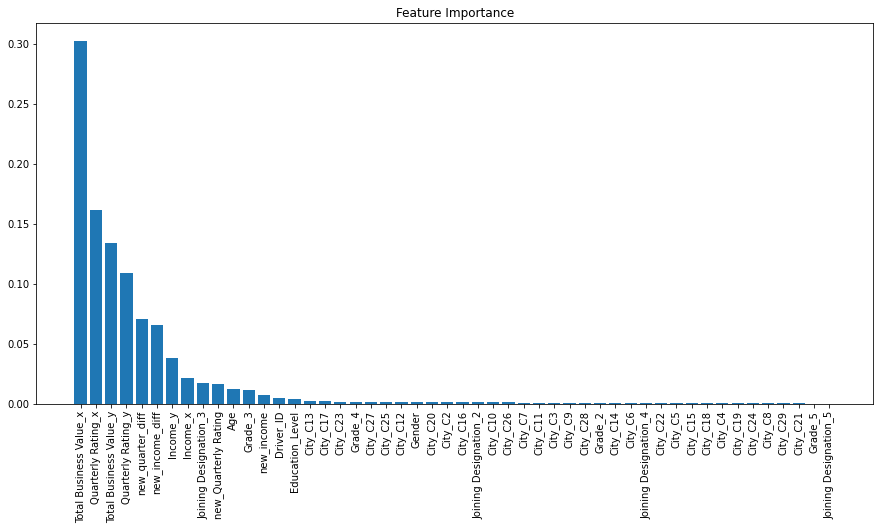

In [ ]:
# Feature importance
import numpy as np
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
clf.fit(X_sm, y_sm)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
#Tring random forest model with different parameters
# Defining Parametes
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [ ]:
from sklearn.model_selection import GridSearchCV

tuning_function = GridSearchCV(estimator = RandomForestClassifier(),
                               param_grid = params,
                               scoring = 'accuracy',
                               cv = 3,
                               n_jobs=-1
                               )

In [ ]:
# Now we will fit all combinations, Take final result or model accuracy.
tuning_function.fit(X_sm, y_sm)

parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 400}
0.8638555739051177


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, max_depth=10, n_estimators=300)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 92.73342532202233 Validation: 85.49467619823244
K-Fold Accuracy Std: Train: 0.271580984868321 Validation: 2.2511942921309163


## **Results Evaluation On Bagging Method:-**

###    **[1] Classification Report**
###    **[2] ROC AUC curve**









In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_sm, y_sm)

RandomForestClassifier()

In [ ]:
print(f"Model Accuracy Score : \nTraining accuracy:{rf.score(X_sm, y_sm)}\nTest Accuracy: {rf.score(X_test, y_test)}")

Model Accuracy Score : 
Training accuracy:1.0
Test Accuracy: 0.8406708595387841


In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[108,  42],
       [ 34, 293]])

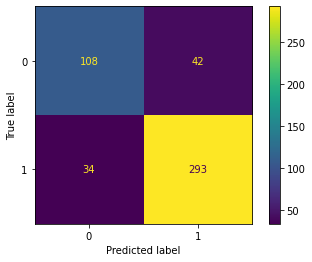

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

**Confusion Matrix :-**

*   Loss to business if model predict churn driver as nonchurn (False Positive). This count is 45
*   And loss if model predict the nonchurn driver as churn  (False Negative). This count is 38
* False positive ratio is 30%

* True positive ratio is 88.38%
*   False negative ratio is 11.62%

*   True negative ratio is 70%





In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       150
         1.0       0.87      0.90      0.89       327

    accuracy                           0.84       477
   macro avg       0.82      0.81      0.81       477
weighted avg       0.84      0.84      0.84       477



**Conclusion on Classification report:-**

*   Here in this casestudy our focus should be more on precision to be more.




*   Precision is 0.87 for retain dataset which is good to tell us that prediction of outoff total retain driver retain prediction driver count  is more.
*   recall for retain customer is 89% which is also good that ola can find out the reason behind churning driver and try to solve it.

*  F1 score is good 0.90 on retain which is good. model giving both the precision and recall rate high which is good to prevent churning of driver and can able to figure out the solution before time.







In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

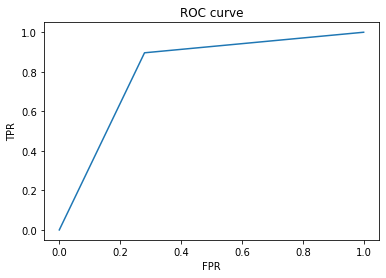

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)  # area under the curve is 0.8080 which is good

0.8080122324159023

**Area under the curve score is 0.8095 hence we can say it's a prity good model.**

## **Xgboost (Ensemble learning Boosting methods)**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, silent=True, n_jobs=8)

In [ ]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_sm, y_sm), verbose=3, random_state=1001 )


start = dt.datetime.now()
random_search.fit(X_sm, y_sm)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.6, 'max_depth': 5, 'learning_rate': 0.5, 'colsample_bytree': 0.6}


In [ ]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.8, max_depth=5, learning_rate=0.5, colsample_bytree=1.0, silent=True)
best_xgb.fit(X_sm, y_sm)

XGBClassifier(colsample_bytree=1.0, learning_rate=0.5, max_depth=5,
              num_class=20, objective='multi:softmax', silent=True,
              subsample=0.8)

In [ ]:
print(f"Model Accuracy Score : \nTraining accuracy:{best_xgb.score(X_sm, y_sm)}\nTest Accuracy: {best_xgb.score(X_test, y_test)}")

Model Accuracy Score : 
Training accuracy:1.0
Test Accuracy: 0.8427672955974843


[0.00903364 0.01128601 0.00822474 0.02093091 0.01065554 0.08388612
 0.3425432  0.05492994 0.01003864 0.05379928 0.01114752 0.
 0.01328318 0.         0.01294968 0.00580196 0.01505056 0.02066508
 0.00863253 0.01070596 0.01317929 0.00780844 0.00824122 0.00765707
 0.01337801 0.00629074 0.01031024 0.00567777 0.00753525 0.01504661
 0.00708427 0.01051445 0.0116738  0.01013729 0.0065832  0.00579563
 0.00417233 0.00619154 0.00684317 0.01735588 0.00521703 0.00949631
 0.01284361 0.02257298 0.01913057 0.         0.00673534 0.01429984
 0.02466352 0.        ]


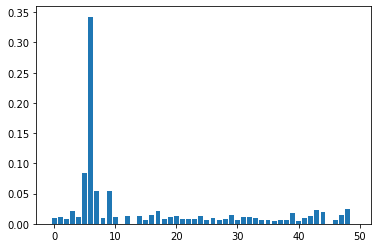

In [ ]:
print(best_xgb.feature_importances_)

plt.bar(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_)
plt.show()

## **Results Evaluation On Bagging Method:-**

###    **[1] Classification Report**
###    **[2] ROC AUC curve**









In [ ]:
y_pred=best_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[105,  45],
       [ 30, 297]])

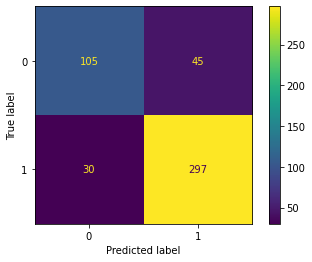

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74       150
         1.0       0.87      0.91      0.89       327

    accuracy                           0.84       477
   macro avg       0.82      0.80      0.81       477
weighted avg       0.84      0.84      0.84       477



In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

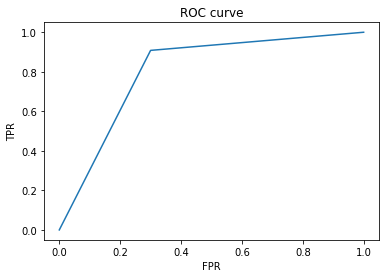

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)  # area under the curve is 0.8041 which is good

0.8041284403669725

## **Gradient Boosting Decision Trees(Ensemble learning Boosting method)**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Define Gradient Boosting Classifier with hyperparameters
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
# Fit train data to GBC
gbc.fit(X_sm, y_sm)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
print(f"Model Accuracy Score : \nTraining accuracy:{gbc.score(X_sm, y_sm)}\nTest Accuracy: {gbc.score(X_test, y_test)}")

Model Accuracy Score : 
Training accuracy:0.9154383242823895
Test Accuracy: 0.8427672955974843


[1.98049333e-02 2.70646593e-02 3.39387177e-03 8.36952156e-03
 2.72401273e-02 1.18886967e-01 3.62788041e-01 7.70028468e-02
 3.16409497e-02 7.50022026e-02 6.26739859e-02 2.04585169e-02
 5.42259105e-02 4.21142315e-03 5.63376990e-03 1.32447297e-03
 2.43809285e-03 6.02662851e-03 2.82986046e-03 2.47153091e-03
 1.50953064e-04 1.81728356e-03 2.07334531e-03 8.72676263e-04
 5.60808388e-03 8.49554910e-04 1.85229967e-03 1.13212853e-03
 3.35057247e-03 2.06157904e-03 1.36474574e-03 4.74276927e-03
 3.43944442e-03 3.38146554e-03 1.67331923e-03 7.83324059e-04
 9.36754649e-04 1.15875591e-03 1.97650533e-03 3.37033002e-03
 4.68192294e-04 1.64682225e-03 3.71775303e-03 2.14216431e-02
 2.03063842e-03 4.89093962e-04 3.17135529e-03 7.81674380e-03
 2.49761239e-03 6.55941519e-04]


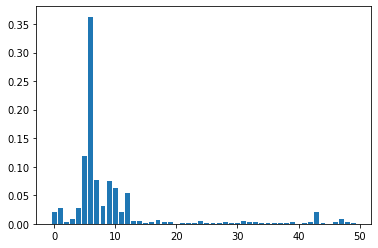

In [ ]:
print(gbc.feature_importances_)

plt.bar(range(len(gbc.feature_importances_)), gbc.feature_importances_)
plt.show()

## **Results Evaluation On Bagging Method:-**

###    **[1] Classification Report**
###    **[2] ROC AUC curve**









In [ ]:
y_pred=gbc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[109,  41],
       [ 34, 293]])

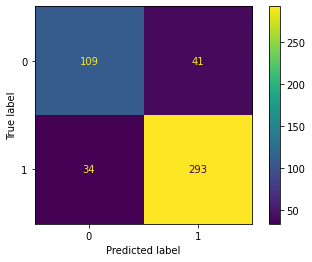

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       150
         1.0       0.88      0.90      0.89       327

    accuracy                           0.84       477
   macro avg       0.82      0.81      0.82       477
weighted avg       0.84      0.84      0.84       477



In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

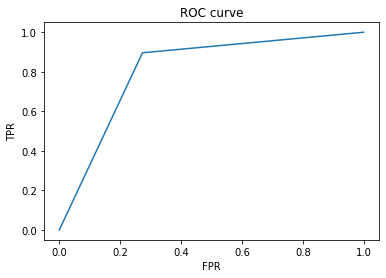

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)  # area under the curve is 0.8113 which is good

0.8113455657492354

## **Adaboost (Ensemble learning Boosting methods)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
adaboost_clf.fit(X_sm, y_sm)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
print(f"Model Accuracy Score : \nTraining accuracy:{adaboost_clf.score(X_sm, y_sm)}\nTest Accuracy: {adaboost_clf.score(X_test, y_test)}")

Model Accuracy Score : 
Training accuracy:0.8828549262994569
Test Accuracy: 0.8364779874213837


## **Results Evaluation On Bagging Method:-**

###    **[1] Classification Report**
###    **[2] ROC AUC curve**









In [ ]:
y_pred=gbc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[109,  41],
       [ 34, 293]])

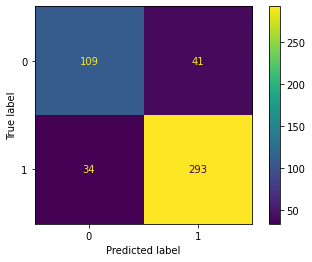

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       150
         1.0       0.88      0.90      0.89       327

    accuracy                           0.84       477
   macro avg       0.82      0.81      0.82       477
weighted avg       0.84      0.84      0.84       477



In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

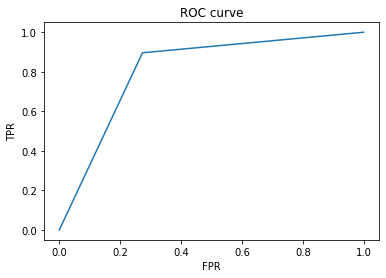

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)  # area under the curve is 0.8113 which is good

0.8113455657492354

**For Ensemble Learning we build 1 model on Bagging and 3 model on boosting . let's check there train and test accuracy, precision, recall ans AUC-ROC score:-**

## **1] Random forest estimator bagging techanique**


*   Train data Accuracy:- 1.0
*   Test data Accuracy:- 0.8406

*   Precision Score for retain drivers:-0.87
*   Recall score for retain driver:-0.90

*   F1 score for retain drver:-0.89
*   ROC-AUC Score:- 0.8080

## **2] Xgboost techanique**

*   Train data Accuracy:- 1.0
*   Test data Accuracy:- 0.8427

*   Precision Score for retain drivers:-0.87
*   Recall score for retain driver:-0.91

*   F1 score for retain drver:-0.89
*   ROC-AUC Score:- 0.7829

## **3] Gradient Boosting Decision Tree**

*   Train data Accuracy:- 0.9154
*   Test data Accuracy:- 0.8427

*   Precision Score for retain drivers:-0.88
*   Recall score for retain driver:-0.90

*   F1 score for retain drver:-0.89
*   ROC-AUC Score:- 0.8113

## **4] Adaboost**

*   Train data Accuracy:- 0.8828
*   Test data Accuracy:- 0.8365

*   Precision Score for retain drivers:-0.88
*   Recall score for retain driver:-0.90

*   F1 score for retain drver:-0.89
*   ROC-AUC Score:- 0.8113

## **The AdaBoost model gives a genuine result as the train data and test data accuracy has very less difference which indicates the good sign of model building. And Adaboost gives precision 88% and recall 90% with f1_score as 89% which is good enough to tell us about the good accuracy.**










# **Actionable Insights & Recommendations:-**

1.   With Adaboosting model we will get to know how many drivers will going to churn in advance with the help of this informaton company can take some action to retain those drivers those are looking for churning.
2.  Maximum driver belong to age limit 28-32 years old so, ola company can provide some offers like helthinsurance and many other options to protect from churning.

1.   In ola 58% are male drivers and 42% approx are female drivers so they can rum campain to maintain this ratio and do marking to incrase the female driver count.
2.   From 2013 to 2018 company driver count was only increasing but from 2019 churning get started. maximum driver jon in month of may,june and july in 2018 so, from this we can say drive use to join company usally in summer sesions.

1.   Ola driver can work on to increase their quarterly rating. because quarterly rating is directly praportional with monthly income and total_business_value.
2.   City C5 driver income is more as compaire to other city drivers income so ola can increase their cab service more in city C5.

1.   Driver count is more in city C20 it means ola service more active in this city so, they can maintain this count and try to increase the cab service as it shows it's most demanding city for ola cab service.
2.   Maximum driver are churning from city C20 and C22 and maximum driver retain are from city C20 and C15.

1.   There is no correation between age and income so we can see almost all age group driver earning approx same monthly income.
2.   To increase the ola business driver has to increase their rating. and to increase the rating driver should provide a good service so for this ola can give traning such as softskill and some driving skills to improve the rating which is going to impact the total_business_value growing.












